In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!pip install fastai==1.0.52
from fastai.text import *

In [0]:
import os
path = Path(os.getcwd())
path = path/'gdrive'/'My Drive'
news=path/'Thesis Data'/'full doc csv'
aa=path/'Thesis Data'/'Our dataset'
aa2=path/'Thesis Data'/'AA dataset'
char=path/'Thesis Data'/'char-ulm'

### LM

In [0]:
bs = 32
bptt = 70
vocab = " !\"#$%&'()*+,-./0123456789:;=<>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]^_`abcdefghijklmnopqrstuvwxyz{|}~¥§©±ঃঅআইঈউঊঋএঐওঔকখগঘঙচছজঝঞটঠডঢণতথদধনপফবভমযরলশষসহ়ািীুূৃেৈোৌ্ৎৗড়ঢ়য়০১২৩৪৫৬৭৮৯৷‘’‚“”‪™−√∝∞"

In [0]:
class NewTokenizer(BaseTokenizer):
    def tokenizer(self,t):
      return [BOS]+[i for i in t]

In [0]:
itos = [UNK, PAD, BOS, EOS, FLD, TK_REP, TK_WREP] + [i for i in vocab]

In [7]:
len(itos)

188

In [0]:
vocab=Vocab(itos)
tokenizer=Tokenizer(NewTokenizer, pre_rules=[], post_rules=[])

## BAAD16

### LM fine tuning

In [0]:
data_lm_AA = TextLMDataBunch.from_csv(aa , 'OurDataset_train.csv', vocab=vocab, bs=bs, tokenizer=tokenizer)
data_lm_AA.save('train_AA_char_lm.pkl')

In [0]:
data_lm_AA = load_data(aa, 'train_AA_char_lm.pkl',bs=bs)

In [0]:
data_lm_AA.show_batch()

idx,text
0,"চ া খ া ব ি ? শ া ম া ব ল ল , হ ্ য া xxunk xxunk আ য় ত ো র ব া ব া র স ঙ ্ গ ে চ া খ া xxunk ত ো র ব া"
1,"য় xxunk ন দ ী র ঘ া ট থ ে ক ে ও xxunk ত ু ম ি য া ও xxunk আ ম ি ব ল ি ল া ম , ত ো ম া ক ে ন ি য় ে ই য া ব xxunk"
2,"ব ি দ ঘ ু ট ে চ ে হ া র া , ক ি ন ্ ত ু ক ী xxunk ব া হ া র ে র স া জ প র ি য ় ে ছ ে ত া দ ে র xxunk হ া ত ি র প ি"
3,ক ি আ জ ও ব ু ঝ ত ে প া র ন ি ! দ ে ব দ া স দ ে য় া ল ে র দ ি ক ে চ া হ ি য় া ছ ি ল xxunk স ে ই দ ি
4,"আ ম া র ভ া ড় া ন া ক ি ম া ফ xxunk অ ন ্ য এ ক ক ্ র ু দ ্ ধ য া ত ্ র ী ব ল ল , হ া র া ম জ া দ া র ে"


In [0]:
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


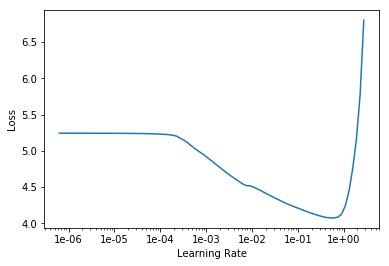

In [0]:
learn.lr_find();
learn.recorder.plot();
plt.savefig('clr_char.eps')

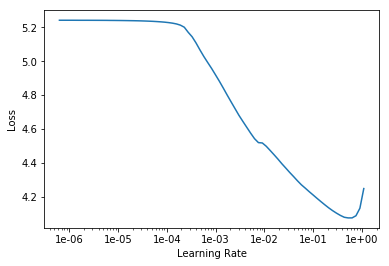

In [0]:
learn.recorder.plot(skip_end=10);
plt.savefig('clr_char_skipend.eps')

In [0]:
learn.load(char/'models'/'news_char_3less_15');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


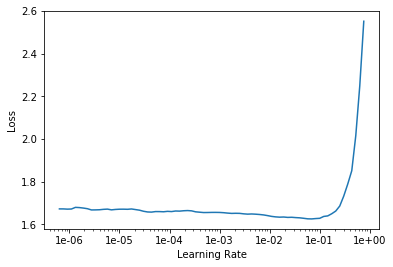

In [0]:
learn.lr_find();
learn.recorder.plot();
plt.savefig('clr_char_lmAA.eps')

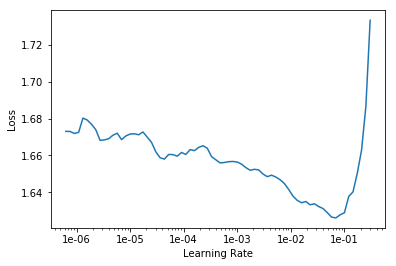

In [0]:
learn.recorder.plot(skip_end=10);
plt.savefig('clr_char_lmAA_skipend.eps')

In [0]:
learn.freeze()
learn.fit_one_cycle(2, 1e-2)
learn.save('AA_char_lm_head');

epoch,train_loss,valid_loss,accuracy,time
0,1.598837,1.568035,0.544921,1:30:35
1,1.599282,1.560101,0.546612,1:30:43


In [0]:
learn.load('AA_char_lm_head');
learn.freeze_to(-2)
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_char_lm_body_1');

epoch,train_loss,valid_loss,accuracy,time
0,1.379611,1.313879,0.611549,1:35:13


In [0]:
learn.freeze_to(-2)
learn.load('AA_char_lm_body_1');
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_char_lm_body_2');

epoch,train_loss,valid_loss,accuracy,time
0,1.365400,1.304870,0.614134,48:49


In [0]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_char_lm_body_3');

epoch,train_loss,valid_loss,accuracy,time
0,1.320679,1.265346,0.624954,54:42


In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_char_lm_body_4');

epoch,train_loss,valid_loss,accuracy,time
0,1.309118,1.253054,0.628506,54:48


In [0]:
learn.load('AA_char_lm_body_4');
learn.unfreeze()
learn.fit_one_cycle(1, 1e-2) 
learn.save('AA_char_lm_body_5');

epoch,train_loss,valid_loss,accuracy,time
0,1.288748,1.248521,0.629602,57:10


In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_char_lm_body_6')

epoch,train_loss,valid_loss,accuracy,time
0,1.283839,1.244428,0.630837,56:57


In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_char_lm_body_7')

epoch,train_loss,valid_loss,accuracy,time
0,1.283226,1.240499,0.631907,56:52


In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_char_lm_body_7')

epoch,train_loss,valid_loss,accuracy,time
0,1.313221,1.237160,0.632947,56:56


In [0]:
learn.load('AA_char_lm_body_7')
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_char_lm_body_9')

epoch,train_loss,valid_loss,accuracy,time
0,1.264964,1.235085,0.633534,58:45


In [0]:
learn.load('AA_char_lm_body_9')
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_char_lm_body_10')

epoch,train_loss,valid_loss,accuracy,time
0,1.271619,1.233565,0.633966,58:36


In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_char_lm_body_11')

epoch,train_loss,valid_loss,accuracy,time
0,1.284968,1.234077,0.633790,58:43


In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('AA_char_lm_body_12')

epoch,train_loss,valid_loss,accuracy,time
0,1.274847,1.230384,0.634880,58:43


In [0]:
learn.save_encoder('AA_char_lm_enc')

### Classifier

In [0]:
data_clas = TextClasDataBunch.from_csv(aa , 'OurDataset_train.csv',  vocab=vocab, bs=bs, tokenizer=tokenizer)
data_clas.save('AA_char_clas.pkl')

In [0]:
data_clas = load_data(aa, 'AA_char_clas.pkl',bs=bs)
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)
learn_cls.load_encoder('AA_char_lm_enc')

In [0]:
data_clas.show_batch()

text,target
"xxbos x x b o s এ ক ন া প ি ত া ন ী আ স ি ল xxunk ন া প ি ত া ন ী স ধ ব া , খ া ট ো র া ঙ ্ গ া প ে ড় ে স া ড় ী প র",bongkim
xxbos x x b o s ক া ট ি ল xxunk ত া র প র স হ স া এ ই ক ু ণ ্ ঠ ি ত ন ী র ব ত া ভ ে দ ক র ি য় া ম ন ্ ত ্ xxunk গ ৃ,shordindu
xxbos x x b o s ও খ া ন ক া র ব ্ য ব স ্ থ া ত ি ন ি ক র ত ে প া র ব ে ন xxunk দ ু ই ম হ া র া জ ল ক ্ ষ ্ ম ী ক র,shordindu
xxbos x x b o s দ ি গ ন ্ ত ে র ক া ছ ে xxunk আ ল ো র আ ভ া দ ে খ া গ ি য় া ছ ি ল স ে খ া ন ে ক ্ র ো শ ে র প র,shordindu
xxbos x x b o s ব ু ঝ ি ত ে প া র ি ল ে ন ন া xxunk দ ু র ্ গ া দ া স ে র স ম ভ ি ব ্ য া হ া র ে গ ঙ ্ গ া ত ী র ে আ স,bongkim


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


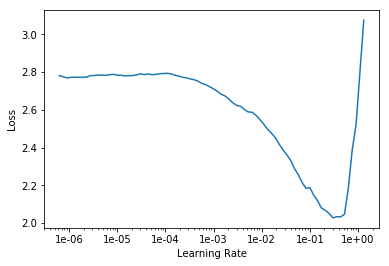

In [0]:
learn_cls.freeze()
learn_cls.lr_find()
learn_cls.recorder.plot()

In [0]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))
learn_cls.save('char_cls_1')

epoch,train_loss,valid_loss,accuracy,time
0,0.505097,0.280998,0.910609,27:55
1,0.301966,0.188242,0.942261,28:09


In [0]:
learn_cls.load('char_cls_1')
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))
learn_cls.save('char_cls_2')

epoch,train_loss,valid_loss,accuracy,time
0,0.282003,0.140016,0.955826,29:25
1,0.120881,0.076272,0.978435,29:21


In [0]:
learn_cls.load('char_cls_2')
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn_cls.save('char_cls_3')

epoch,train_loss,valid_loss,accuracy,time
0,0.104510,0.089910,0.973565,1:00:10
1,0.062268,0.063222,0.978783,1:00:25


In [0]:
learn_cls.load('char_cls_3')
learn_cls.unfreeze()
learn_cls.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn_cls.save('char_cls_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.045319,0.051697,0.984696,1:10:14
1,0.046025,0.053418,0.983304,1:10:15


In [10]:
learn_cls.load('char_cls_4')
learn_cls.unfreeze()
learn_cls.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn_cls.save('char_cls_5')

epoch,train_loss,valid_loss,accuracy,time
0,0.037111,0.048874,0.984348,1:11:10
1,0.038741,0.049446,0.985739,1:10:58


In [0]:
def testing(dts):
  df = pd.read_csv(dts) 
  text_array = df["text"].tolist()
  print(len(text_array))

  final_preds = []

  for text in text_array:
      preds = learn_cls.predict(text)
      final_preds.append(str(preds[0]))

  targets = df["label"].tolist()

  err=[]
  count =0;
  tst = len(text_array)

  for i in range(tst):
      if(targets[i]==final_preds[i]):
          count = count+1
      else:
  #         print(targets[i] + ", " + final_preds[i] + ';')
          err.append((targets[i],final_preds[i]))
  print("Accuracy: ")
  print(count/tst)
  print(err)
  return final_preds, targets

In [12]:
pred,targ = testing(aa/'OurDataset_test.csv')

3592
Accuracy: 
0.9855233853006682
[('shunil_gongopaddhay', 'shirshendu'), ('shottojit_roy', 'tarashonkor'), ('manik_bandhopaddhay', 'shordindu'), ('humayun_ahmed', 'toslima_nasrin'), ('shirshendu', 'shordindu'), ('manik_bandhopaddhay', 'MZI'), ('MZI', 'humayun_ahmed'), ('shorotchandra', 'robindronath'), ('tarashonkor', 'shordindu'), ('toslima_nasrin', 'humayun_ahmed'), ('shunil_gongopaddhay', 'shomresh'), ('shunil_gongopaddhay', 'shomresh'), ('bongkim', 'robindronath'), ('MZI', 'humayun_ahmed'), ('nazrul', 'robindronath'), ('shirshendu', 'shorotchandra'), ('shordindu', 'bongkim'), ('nazrul', 'robindronath'), ('nazrul', 'robindronath'), ('humayun_ahmed', 'shordindu'), ('shunil_gongopaddhay', 'bongkim'), ('bongkim', 'robindronath'), ('shorotchandra', 'nihar_ronjon_gupta'), ('MZI', 'humayun_ahmed'), ('manik_bandhopaddhay', 'shunil_gongopaddhay'), ('shunil_gongopaddhay', 'manik_bandhopaddhay'), ('nazrul', 'robindronath'), ('tarashonkor', 'shorotchandra'), ('shorotchandra', 'tarashonkor'),

In [13]:
from sklearn.metrics import f1_score
out  = f1_score(targ, pred, average='weighted')
out

0.9855015023602931

In [14]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(targ, pred)
print(cm)

[[215   0   3   0 ...   0   0   1   0]
 [  0 110   0   0 ...   0   0   0   0]
 [  0   0 901   0 ...   1   0   1   0]
 [  1   0   0  88 ...   1   0   0   0]
 ...
 [  0   1   0   1 ... 387   1   0   0]
 [  0   0   0   0 ...   0 151   0   0]
 [  0   0   1   0 ...   0   0 184   0]
 [  0   0   0   0 ...   0   0   0  37]]


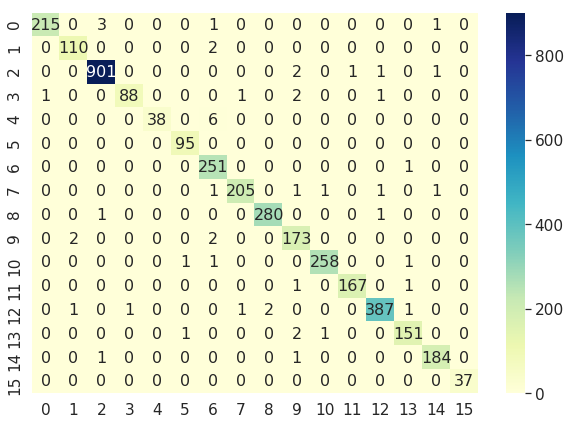

In [15]:
import seaborn as sn

df_cm = pd.DataFrame(cm, range(16),range(16))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g',cmap="YlGnBu")# font size

import matplotlib.pyplot as plt
plt.savefig('news_character_AA.eps')

In [0]:
from google.colab import files
files.download('news_character_AA.eps')